0


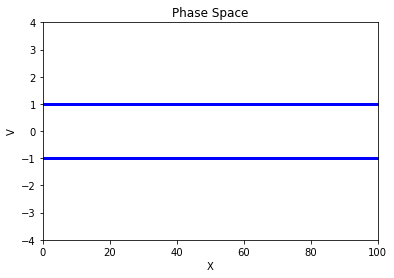

500


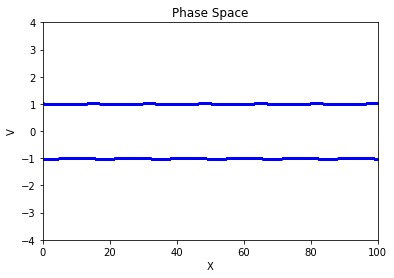

700


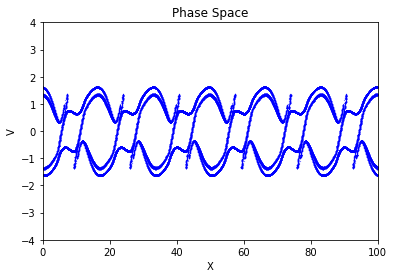

850


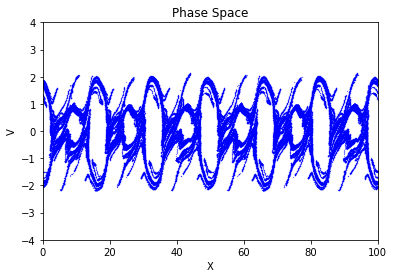

1000


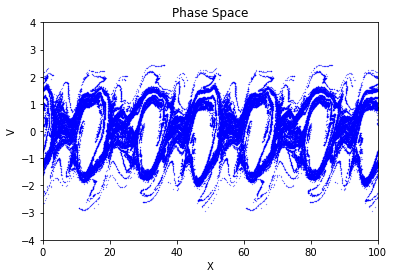

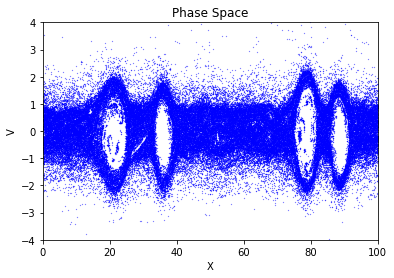

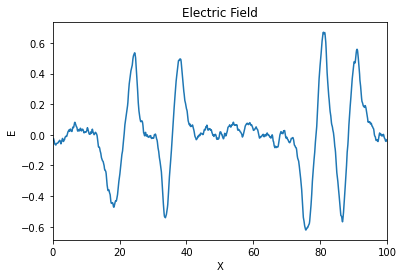

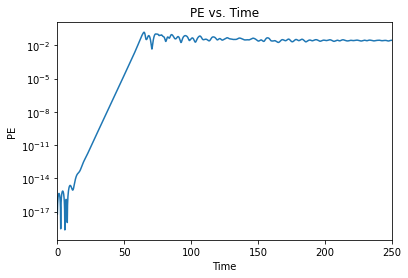

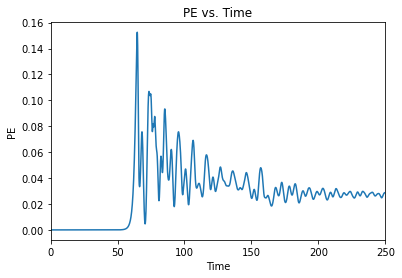

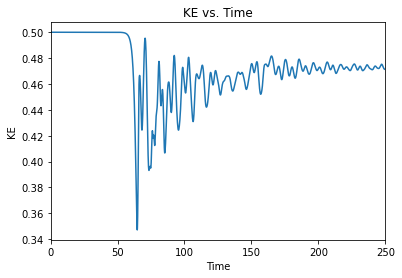

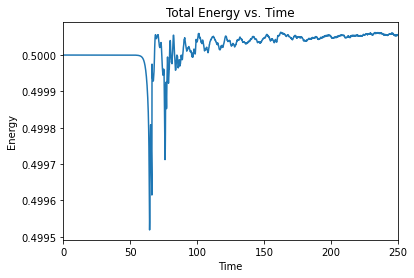

In [337]:
import numpy as np
from matplotlib import pyplot

### CONSTANTS & PARAMETERS ###

L = 100                   # Domain size
NG = 1000                 # Number of grid cells
N = 100000                # Number of particles (100,000)
dx = 0.1                  # Cell/particle size
dt = 0.1                  # Time step
tsteps = 2500             # No. of time steps (100 sec)
t = dt*tsteps
n0 = 1.

Vortices = 6.


### DISTRIBUTION OF PARTICLES ###

x = np.linspace(0,L,N,False)      # Even distribution
vel = np.ones(N)                  
for i in range(N):                # Velocity of Particles, alternating +,- 
    vel[i//2*2+1] = -1.

### CHARGE DENSITIES - LINEAR INTERPOLATION AND WEIGHTING OF PARTICLES-IN-CELL (PIC) ###

c = np.floor(x/dx).astype(int)            # Assigning particles to cells and weighting them (Linear Interpolation)
c1 = c+1
c_w = (c1*dx - x)/dx
c1_w = (x - c*dx)/dx
c1 = np.mod(c1, NG)                       # Want last cell of j1 to be first cell (periodic)

n = np.bincount(c, weights = c_w, minlength=NG)
n += np.bincount(c1, weights = c1_w, minlength=NG)

n *= L/N/dx                                # Normalize density to 1


### INITIALIZE E FIELD AND ACCEL ###

grid = np.linspace(0, L, NG, False)
E = np.ones(NG)
E *= (10**-6)*np.sin(2*np.pi*Vortices*grid/L)

E_particle = E[c]*c_w + E[c1]*c1_w
accel = -E_particle

PE = np.zeros(tsteps)
PE2= np.zeros(tsteps)
KE = np.zeros(tsteps)
p_sys = np.zeros(tsteps)


### MOVE ###

for h in range(tsteps):
    velold = vel

    vel += accel * dt/2.
    x   += vel * dt
    x   = np.mod(x,L)
    
### FIELD/ACCEL CALCULATION ###
    
    c = np.floor(x/dx).astype(int)            # Assigning particles to cells and weighting them (Linear Interpolation)
    c1 = c+1
    c_w = (c1*dx - x)/dx
    c1_w = (x - c*dx)/dx
    c1 = np.mod(c1, NG)                       # Want last cell of j1 to be first cell (periodic)

    n = np.bincount(c, weights = c_w, minlength=NG)
    n += np.bincount(c1, weights = c1_w, minlength=NG)
    n *= L/N/dx                                # Normalize density to 1

    
    for i in range(NG):
        E[i] = E[i-1] + (n0 - 0.5*(n[i] + n[i-1]))*dx       # Forward Finite Difference Method (2nd Order)
    
    
    avg_E = np.sum(E)/len(E)
    E = E - avg_E
    
    
    E_particle = E[c]*c_w + E[c1]*c1_w
    accel = -E_particle
    
    PE2[h] = np.sum(E*E/2.)/(NG)
    vel += accel*dt/2.
    velnew = vel
    
    v2 = velold*velnew
    KE[h]= np.sum(0.5*v2)/N
    p_sys[h] = np.sum(vel)
    
    
### PLOTS ###

    if ( h == 0  or h == 500 or h == 700 or h == 850 or h == 1000 ):
        print(h)
    #    time = np.linspace(0,dt*tsteps,tsteps)
        pyplot.axis([0,L,-4,4])
        pyplot.title('Phase Space')
        pyplot.scatter(x,vel, s=.04, color = 'blue')
        pyplot.xlabel('X')
        pyplot.ylabel('V')
        pyplot.xlim((0,100))
        pyplot.show()

    
pyplot.title('Phase Space')
pyplot.scatter(x,vel, s=.04, color = 'blue')
pyplot.xlabel('X')
pyplot.ylabel('V')
pyplot.xlim((0,L))
pyplot.ylim((-4,4))
pyplot.show()
#pyplot.pause(.001)
#pyplot.plot(grid,n)
#pyplot.title('Densities')
#pyplot.xlabel('X')
#pyplot.ylabel('n')
#pyplot.show()
pyplot.plot(grid,E)
pyplot.xlim((0,L))
pyplot.title('Electric Field')
pyplot.xlabel('X')
pyplot.ylabel('E')
pyplot.show()



time = np.linspace(0,dt*tsteps,tsteps)
TE = KE + PE2

pyplot.title('PE vs. Time')
pyplot.yscale("log")
pyplot.plot(time, PE2)
pyplot.xlabel('Time')
pyplot.ylabel('PE')
pyplot.xlim((0,t))
pyplot.show()

pyplot.title('PE vs. Time')
pyplot.plot(time, PE2)
pyplot.xlabel('Time')
pyplot.ylabel('PE')
pyplot.xlim((0,t))
pyplot.show()

pyplot.title('KE vs. Time')
pyplot.plot(time, KE)
pyplot.xlabel('Time')
pyplot.ylabel('KE')
pyplot.xlim((0,t))
pyplot.show()

pyplot.title('Total Energy vs. Time')
pyplot.plot(time, TE)
pyplot.xlabel('Time')
pyplot.ylabel('Energy')
pyplot.xlim((0,t))
pyplot.show()

#print(E)
    #pyplot.pause(.001)

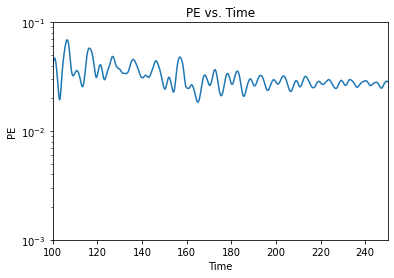

In [340]:
pyplot.title('PE vs. Time')
pyplot.yscale("log")
pyplot.ylim(.001,.1)
pyplot.plot(time, PE2)
pyplot.xlim(100,250
           )
pyplot.xlabel('Time')
pyplot.ylabel('PE')
pyplot.show()


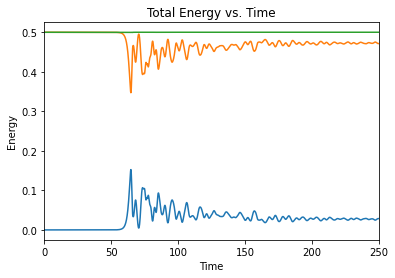

In [339]:
pyplot.title('PE vs. Time')
pyplot.plot(time, PE2)
pyplot.title('KE vs. Time')
pyplot.plot(time, KE)
pyplot.title('Total Energy vs. Time')
pyplot.plot(time, TE)
pyplot.xlabel('Time')
pyplot.ylabel('Energy')
pyplot.xlim((0,t))
pyplot.show()

<ipython-input-333-0a117aa48bd5>:5: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  pyplot.ylim((0,10**-8))


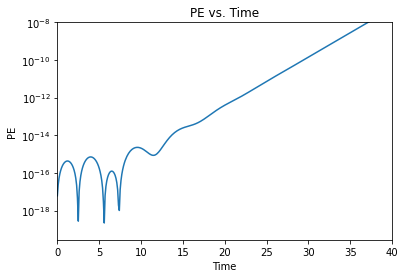

In [333]:
pyplot.title('PE vs. Time')
pyplot.yscale("log")
pyplot.plot(time, PE2)
pyplot.xlim((0,40))
pyplot.ylim((0,10**-8))

pyplot.xlabel('Time')
pyplot.ylabel('PE')
pyplot.show()
#print(test)

In [334]:
#start = 130
#stop = 150

start = 260
stop = 300
t_int = stop - start

#oscil = 5.                   #counted
oscil = 9.

test = np.zeros(t_int)
j = 0
for i in range (start,stop):
    test[j] = PE2[i]
    j+=1

print(min(test))  
print(np.argmin(test))

p_oscill = (np.argmin(test) + start)*dt/oscil
print('Plasma Oscillation Period:',p_oscill)




1.3488313920005794e-11
0
Plasma Oscillation Period: 2.888888888888889


gamma = 2.970262735711973


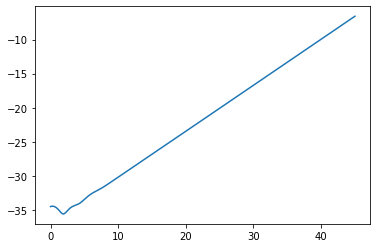

In [280]:
# Between 25 and 70 shall be a perfect straight line.
# Calculate the increment of instability /gamma, i.e. E~exp (2/gamma t).


### CALCULATING GAMMA ###
st = 450
interval = np.zeros(st)
time_int = np.linspace(0,dt*st,st)
j = 0
for i in range (350,800):
    interval[j] = PE2[i]
    j+=1


gamma_t2 = np.log(interval)
gamma_2 = np.gradient(gamma_t2)
invg_2 = (gamma_t2[399] - gamma_t2[200])/20.

gamma = 2./invg_2
print('gamma =',gamma)

pyplot.plot(time_int, gamma_t2)


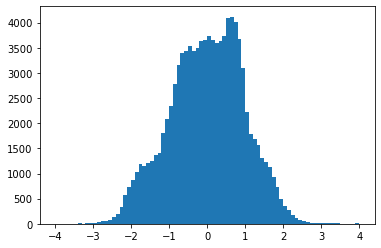

In [323]:
dv = 0.1
b = np.arange(-4,4+dv, dv)
#print(b)
pyplot.hist(vel, bins = b);
 

In [324]:
dv = 0.1
veldv = ((vel+4.)/dv).astype(int)
print(veldv)

vcount = np.bincount(veldv, minlength = 80)
print(max(vcount))
print(np.argmax(vcount))
print(vcount[40])

vel_norm = vcount / (max(vcount).astype(float))




print(len(vcount))

[46 36 60 ... 30 31 25]


ValueError: 'list' argument must have no negative elements

In [313]:
dv = 0.1
veldv = ((vel+4.)/dv).astype(int)
vcount = np.bincount(veldv, minlength = 80)

vel_norm = vcount / ((vcount[np.argmax(vcount)]).astype(float))
#pyplot.plot(vel_norm)  #length 78

vbins = np.linspace(-4,4,len(vel_norm))



pyplot.plot(vbins, vel_norm)

ValueError: 'list' argument must have no negative elements

0.3183098861837907


Text(0, 0.5, 'Momentum')

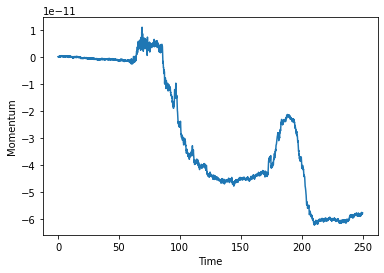

In [325]:
pyplot.plot(time,p_sys)
pyplot.xlabel('Time')
pyplot.ylabel('Momentum')
#pyplot.yscale("log")
#print(sum(vel))
#print(p_sys)

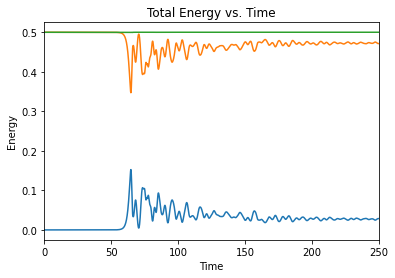

In [315]:
pyplot.title('PE vs. Time')
pyplot.plot(time, PE2)
pyplot.title('KE vs. Time')
pyplot.plot(time, KE)
pyplot.title('Total Energy vs. Time')
pyplot.plot(time, TE)
pyplot.xlabel('Time')
pyplot.ylabel('Energy')
pyplot.xlim((0,t))
pyplot.show()

import numpy as np
from matplotlib import pyplot

### CONSTANTS & PARAMETERS ###

L = 100                   # Domain size
NG = 1000                 # Number of grid cells
N = 100000                # Number of particles (100,000)
dx = 0.1                  # Cell/particle size
dt = 0.1                  # Time step
tsteps = 5000             # No. of time steps (100 sec)
t = dt*tsteps
n0 = 1.

Vortices = 6.


### DISTRIBUTION OF PARTICLES ###

x = np.linspace(0,L,N,False)      # Even distribution
vel = np.ones(N)                  
for i in range(N):                # Velocity of Particles, alternating +,- 
    vel[i//2*2+1] = -1.

### CHARGE DENSITIES - LINEAR INTERPOLATION AND WEIGHTING OF PARTICLES-IN-CELL (PIC) ###

c = np.floor(x/dx).astype(int)            # Assigning particles to cells and weighting them (Linear Interpolation)
c1 = c+1
c_w = (c1*dx - x)/dx
c1_w = (x - c*dx)/dx
c1 = np.mod(c1, NG)                       # Want last cell of j1 to be first cell (periodic)

n = np.bincount(c, weights = c_w, minlength=NG)
n += np.bincount(c1, weights = c1_w, minlength=NG)

n *= L/N/dx                                # Normalize density to 1


### INITIALIZE E FIELD AND ACCEL ###

grid = np.linspace(0, L, NG, False)
E = np.ones(NG)
E *= (10**-6)*np.sin(2*np.pi*Vortices*grid/L)

E_particle = E[c]*c_w + E[c1]*c1_w
accel = -E_particle

PE = np.zeros(tsteps)
PE2= np.zeros(tsteps)
KE = np.zeros(tsteps)
p_sys = np.zeros(tsteps)


### MOVE ###

for h in range(tsteps):
    velold = vel

    vel += accel * dt/2.
    x   += vel * dt
    x   = np.mod(x,L)
    
### FIELD/ACCEL CALCULATION ###
    
    c = np.floor(x/dx).astype(int)            # Assigning particles to cells and weighting them (Linear Interpolation)
    c1 = c+1
    c_w = (c1*dx - x)/dx
    c1_w = (x - c*dx)/dx
    c1 = np.mod(c1, NG)                       # Want last cell of j1 to be first cell (periodic)

    n = np.bincount(c, weights = c_w, minlength=NG)
    n += np.bincount(c1, weights = c1_w, minlength=NG)
    n *= L/N/dx                                # Normalize density to 1

    
    for i in range(NG):
        E[i] = E[i-1] + (n0 - 0.5*(n[i] + n[i-1]))*dx       # Forward Finite Difference Method (2nd Order)
    
    
    avg_E = np.sum(E)/len(E)
    E = E - avg_E
    
    
    E_particle = E[c]*c_w + E[c1]*c1_w
    accel = -E_particle
    
    PE2[h] = np.sum(E*E/2.)/(NG)
    vel += accel*dt/2.
    velnew = vel
    
    v2 = velold*velnew
    KE[h]= np.sum(0.5*v2)/N
    p_sys[h] = np.sum(vel)
    
    
### PLOTS ###

    if ( h == 0  or h == 500 or h == 700 or h == 850 or h == 1000 ):
        print(h)
    #    time = np.linspace(0,dt*tsteps,tsteps)
        pyplot.axis([0,L,-4,4])
        pyplot.title('Phase Space')
        pyplot.scatter(x,vel, s=.04, color = 'blue')
        pyplot.xlabel('X')
        pyplot.ylabel('V')
        pyplot.xlim((0,100))
        pyplot.show()

    
    pyplot.title('Phase Space')
    pyplot.scatter(x,vel, s=.04, color = 'blue')
    pyplot.xlabel('X')
    pyplot.ylabel('V')
    pyplot.xlim((0,L))
    pyplot.ylim((-4,4))
    pyplot.show()
#pyplot.pause(.001)
#pyplot.plot(grid,n)
#pyplot.title('Densities')
#pyplot.xlabel('X')
#pyplot.ylabel('n')
#pyplot.show()
pyplot.plot(grid,E)
pyplot.xlim((0,L))
pyplot.title('Electric Field')
pyplot.xlabel('X')
pyplot.ylabel('E')
pyplot.show()



time = np.linspace(0,dt*tsteps,tsteps)
TE = KE + PE2

pyplot.title('PE vs. Time')
pyplot.yscale("log")
pyplot.plot(time, PE2)
pyplot.xlabel('Time')
pyplot.ylabel('PE')
pyplot.xlim((0,t))
pyplot.show()

pyplot.title('PE vs. Time')
pyplot.plot(time, PE2)
pyplot.xlabel('Time')
pyplot.ylabel('PE')
pyplot.xlim((0,t))
pyplot.show()

pyplot.title('KE vs. Time')
pyplot.plot(time, KE)
pyplot.xlabel('Time')
pyplot.ylabel('KE')
pyplot.xlim((0,t))
pyplot.show()

pyplot.title('Total Energy vs. Time')
pyplot.plot(time, TE)
pyplot.xlabel('Time')
pyplot.ylabel('Energy')
pyplot.xlim((0,t))
pyplot.show()

#print(E)
    #pyplot.pause(.001)